# Project 3: Recommendation System

### Question 1

In [12]:
import pandas as pd

ratings = pd.read_csv("Synthetic_Movie_Lens/ratings.csv",
                      usecols = ['userId', 'movieId', 'rating'])

In [13]:
ratings.head(5)

,userId,movieId,rating
0,496,112852,3.0
1,391,1947,4.0
2,387,1562,1.5
3,474,2716,4.5
4,483,88125,4.5


In [14]:
# Question 1 - Part A

# Calculate total_availble_ratings
total_available_ratings = len(ratings)

# Calculate total_possible_ratings
total_users = ratings['userId'].nunique()
total_movies = ratings['movieId'].nunique()
total_possible_ratings = total_users * total_movies

# Calculate sparisty
sparsity = total_available_ratings / total_possible_ratings

# Print Results
print('Sparsity of the Movie Rating Dataset: ', sparsity)

Sparsity of the Movie Rating Dataset:  0.016999683055613623


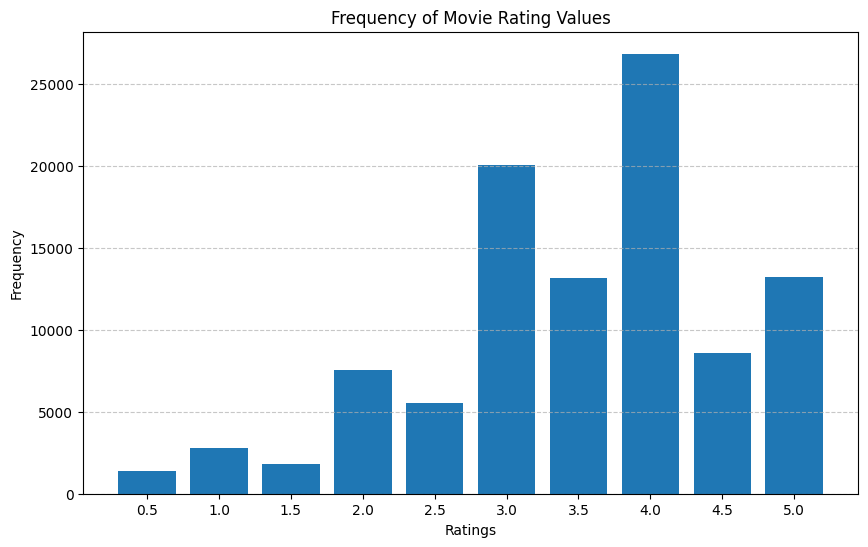

In [45]:
# Question 1 - Part B
import numpy as np
import matplotlib.pyplot as plt

# Creating bins
bins = np.arange(0.5, 6.0, 0.5)

# Creating tick positions
tick_positions = np.arange(0.5, 5.5, 0.5)

# Calculate the counts for each bin
counts, _ = np.histogram(ratings['rating'], bins = bins)

# Plot histogram 
plt.figure(figsize = (10, 6))
plt.bar(tick_positions, counts, width = 0.4, align = 'center')
plt.xticks(tick_positions, tick_positions)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.title('Frequency of Movie Rating Values')
plt.show()

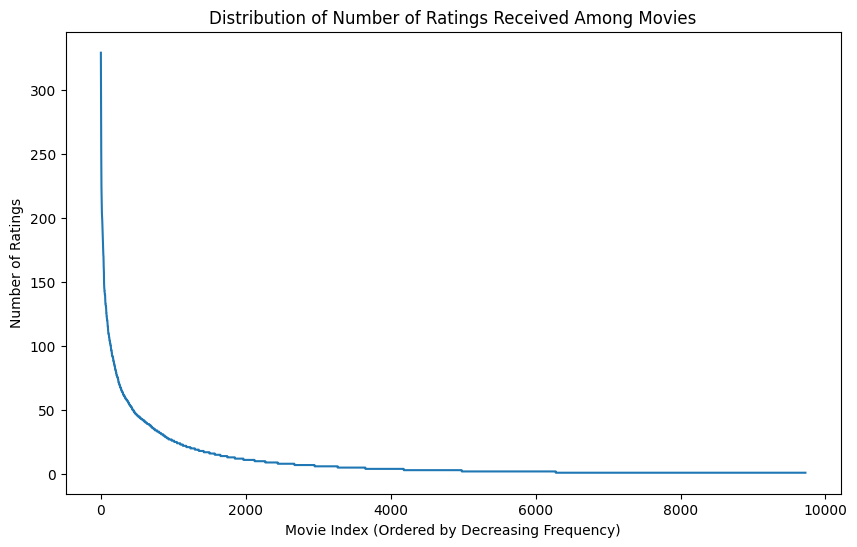

In [46]:
# Question 1 - Part C

# Calculate the number of ratings received by each movie
movie_ratings_count = ratings['movieId'].value_counts()

# Sort movies based on the number of ratings in descending order
sorted_movie_indices = movie_ratings_count.index
sorted_ratings_count = movie_ratings_count.values

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(sorted_ratings_count)
plt.title('Distribution of Number of Ratings Received Among Movies')
plt.xlabel('Movie Index (Ordered by Decreasing Frequency)')
plt.ylabel('Number of Ratings')
plt.show()

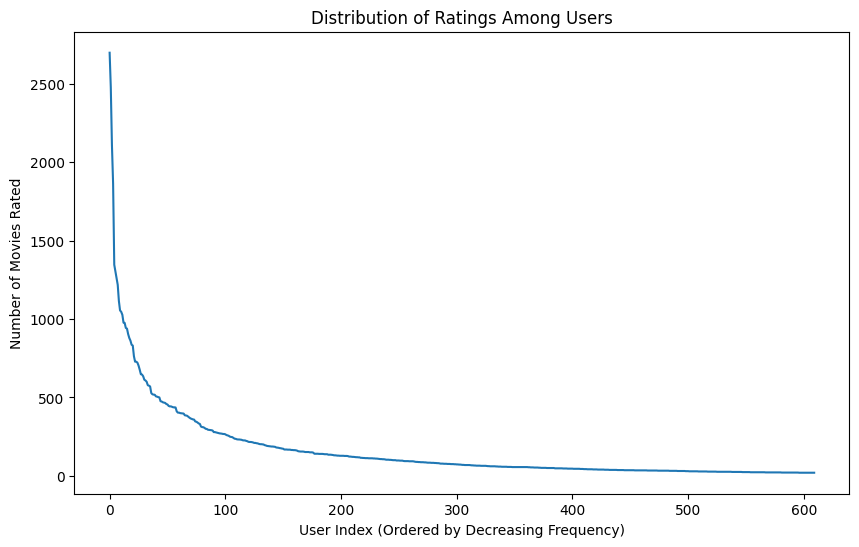

In [47]:
# Question 1 - Part D

# Calculate ratings given by each user
user_ratings_count = ratings['userId'].value_counts()

# Sort users based on the number of ratings in descending order
sorted_user_indices = user_ratings_count.index
sorted_ratings_count = user_ratings_count.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_ratings_count)
plt.title('Distribution of Ratings Among Users')
plt.xlabel('User Index (Ordered by Decreasing Frequency)')
plt.ylabel('Number of Movies Rated')
plt.show()

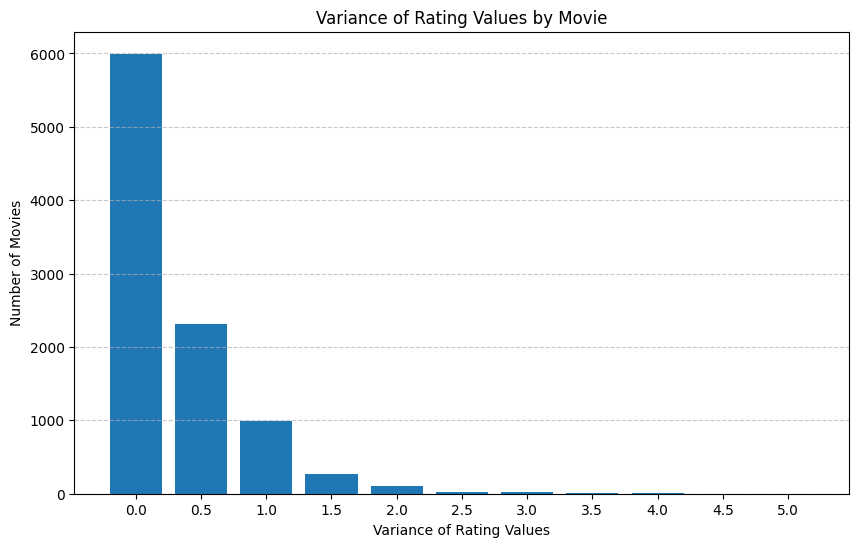

In [70]:
# Question 1 - Part F

# Compute variances for each movie
unique_movie_ID = np.unique(ratings['movieId'])
variances = []
for movie_id in unique_movie_ID:
    indices = np.where(ratings['movieId'] == movie_id)[0]
    movie_ratings = ratings['rating'].iloc[indices]
    var = np.var(movie_ratings)
    variances.append(var)

# Create bins for histogram
bins = np.arange(0, 5.6, 0.5) 

# Calculate counts for each bin
counts, _ = np.histogram(variances, bins=bins)

# Plot 
plt.figure(figsize=(10, 6))
tick_positions = np.arange(0, 6, 0.5) 
plt.bar(tick_positions[:-1], counts, width = 0.4, align = 'center') 
plt.xticks(tick_positions[:-1], tick_positions[:-1])  
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.ylabel('Number of Movies')
plt.xlabel('Variance of Rating Values')
plt.title('Variance of Rating Values by Movie')
plt.show()

### Question 4

In [84]:
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import cross_validate

reader = Reader(rating_scale = (0.5, 5.0))
ratings_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 101, 2)

avg_rmse_values = []
avg_mae_values = []

for k in k_values:
    algo = KNNWithMeans(k = k, sim_options={'name': 'pearson'})
    results = cross_validate(algo, data = ratings_data, measures = ['RMSE', 'MAE'], cv = 10)
    
    # Compute average RMSE and MAE
    avg_rmse = np.mean(results['test_rmse'])
    avg_mae = np.mean(results['test_mae'])
    
    avg_rmse_values.append(avg_rmse)
    avg_mae_values.append(avg_mae)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

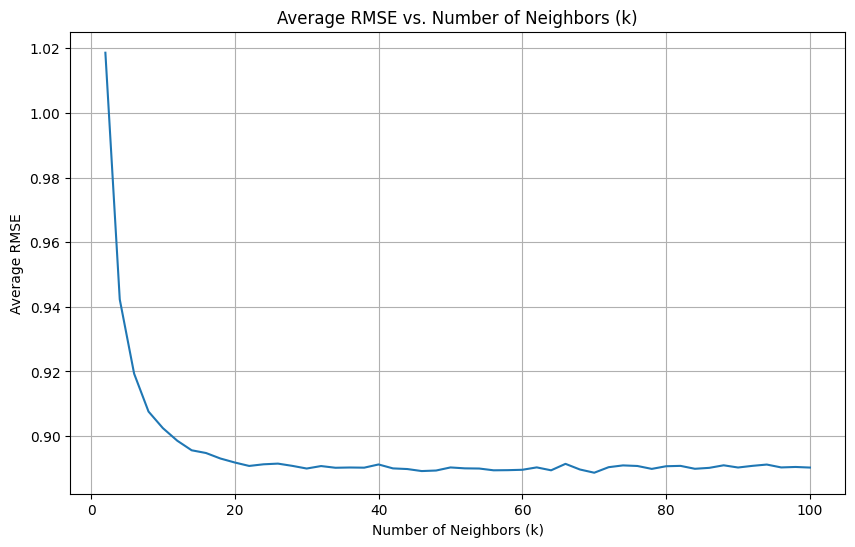

In [85]:
# Plot average RMSE against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_rmse_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

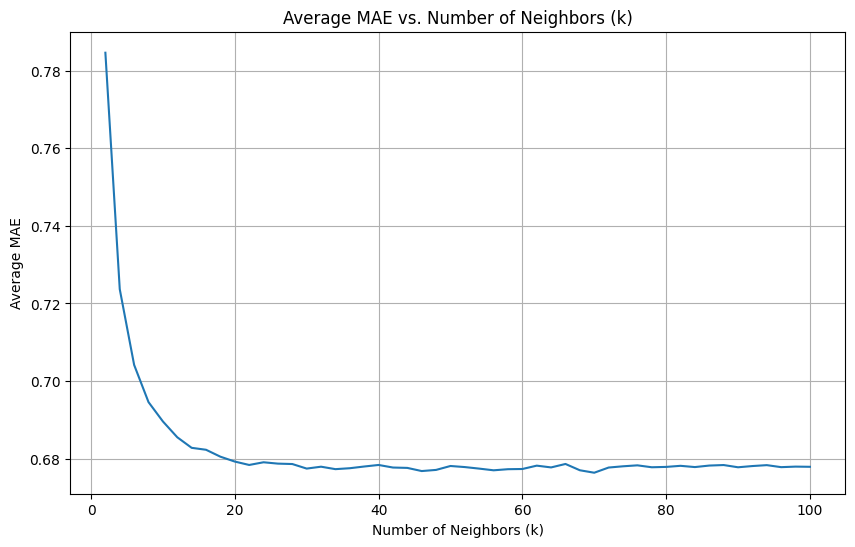

In [86]:
# Plot average MAE against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_mae_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average MAE')
plt.title('Average MAE vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

### Question 5

In [87]:
min_rmse = min(avg_rmse_values)
min_index = np.argmin(avg_rmse_values)
min_mae = min(avg_mae_values)

print('Minimum value of RMSE: ', min_rmse)
print('Index corresponding to minimum RMSE: ', min_index)
print('Minimum value of MAE: ', min_mae)

Minimum value of RMSE:  0.8886392923530291
Index corresponding to minimum RMSE:  34
Minimum value of MAE:  0.6763654820329033


### Question 6

#### PART A

In [88]:
# Popular Movie Trimming
popular_movies = ratings.groupby('movieId').size() > 2
popular_subset = ratings[ratings['movieId'].isin(popular_movies[popular_movies].index)]
popular_subset.to_csv("popular_subset.csv", index=False)

# Unpopular Movie Trimming
unpopular_movies = ratings.groupby('movieId').size() <= 2
unpopular_subset = ratings[ratings['movieId'].isin(unpopular_movies[unpopular_movies].index)]
unpopular_subset.to_csv("unpopular_subset.csv", index=False)

# High Variance Movie Trimming
movie_variance = ratings.groupby('movieId')['rating'].var()
high_variance_subset = ratings.groupby('movieId').filter(lambda x: x['rating'].var() >= 2 and len(x) >= 5)
high_variance_subset.to_csv("high_variance_subset.csv", index=False)

# Print the number of movies in each trimmed subset
print("Number of movies in Popular subset:", len(popular_subset['movieId'].unique()))
print("Number of movies in Unpopular subset:", len(unpopular_subset['movieId'].unique()))
print("Number of movies in High Variance subset:", len(high_variance_subset['movieId'].unique()))


Number of movies in Popular subset: 4980
Number of movies in Unpopular subset: 4744
Number of movies in High Variance subset: 88


In [89]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# Load the trimmed dataset for Popular subset
reader = Reader(rating_scale=(0.5, 5.0))
popular_subset_df = pd.read_csv("popular_subset.csv")
data = Dataset.load_from_df(popular_subset_df[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 101, 2)

min_avg_rmse_values = []

# Iterate over each k value
for k in k_values:
    algo = KNNWithMeans(k = k, sim_options = {'name': 'pearson'})
    results = cross_validate(algo, data, measures = ['RMSE'], cv = 10)
    
    # Compute average RMSE
    avg_rmse = np.mean(results['test_rmse'])
    min_avg_rmse_values.append(avg_rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

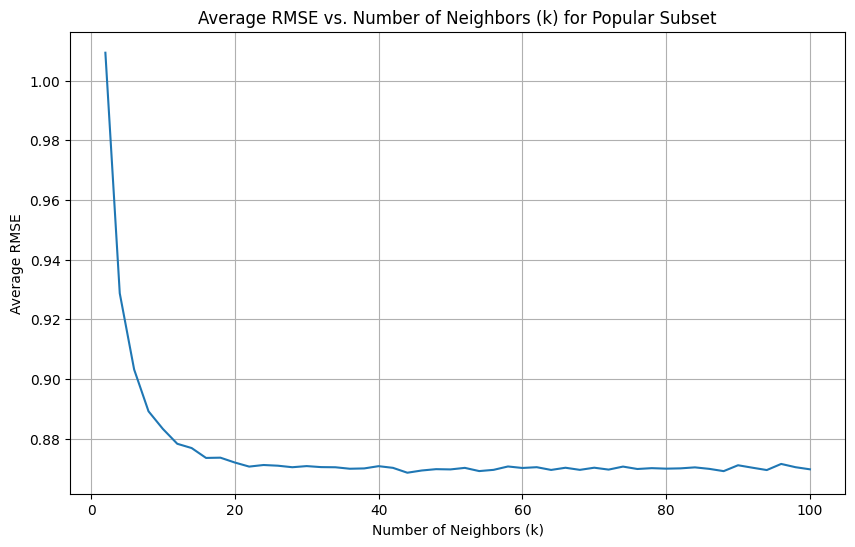

Minimum average RMSE for Popular Subset: 0.8685464476257595
Corresponding k value: 44


In [90]:
# Plot average RMSE against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, min_avg_rmse_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Neighbors (k) for Popular Subset')
plt.grid(True)
plt.show()

# Find minimum average RMSE and corresponding k value
min_avg_rmse = min(min_avg_rmse_values)
min_k = k_values[min_avg_rmse_values.index(min_avg_rmse)]

print('Minimum average RMSE for Popular Subset:', min_avg_rmse)
print('Corresponding k value:', min_k)

In [96]:
reader = Reader(rating_scale=(0.5, 5.0))
unpopular_subset_df = pd.read_csv("unpopular_subset.csv")
data = Dataset.load_from_df(unpopular_subset_df[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 101, 2)

avg_rmse_values_unpopular = []

for k in k_values:
    algo = KNNWithMeans(k = k, sim_options = {'name': 'pearson'})
    results = cross_validate(algo, data, measures = ['RMSE'], cv = 10)
    
    # Compute average RMSE
    avg_rmse = np.mean(results['test_rmse'])
    avg_rmse_values_unpopular.append(avg_rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

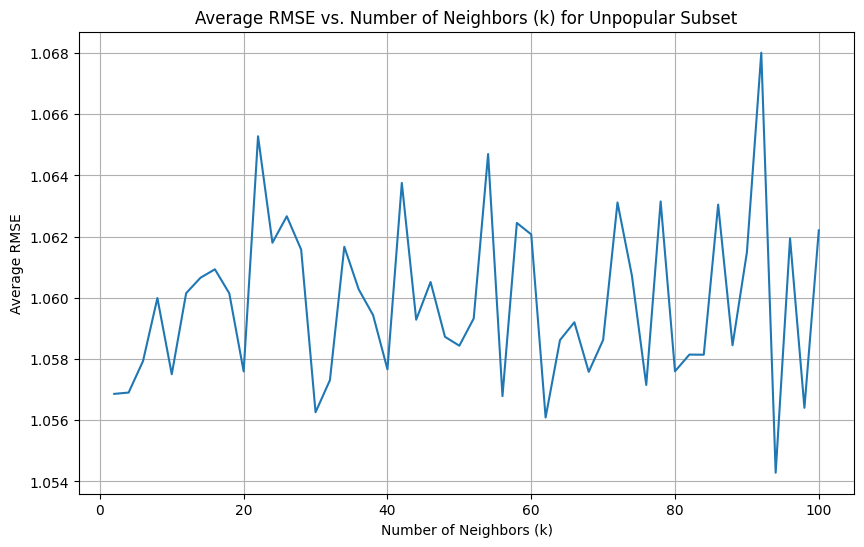

Minimum average RMSE for Unpopular Subset: 1.0542864346508076
Corresponding k value: 94


In [97]:
# Plot average RMSE against k for the Unpopular subset
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_rmse_values_unpopular)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Neighbors (k) for Unpopular Subset')
plt.grid(True)
plt.show()

# Find the minimum average RMSE and corresponding k value for the Unpopular subset
min_avg_rmse_unpopular = min(avg_rmse_values_unpopular)
min_k_unpopular = k_values[np.argmin(avg_rmse_values_unpopular)]

print('Minimum average RMSE for Unpopular Subset:', min_avg_rmse_unpopular)
print('Corresponding k value:', min_k_unpopular)

In [98]:
# Load the trimmed dataset for High Variance subset
reader = Reader(rating_scale=(0.5, 5.0))
high_variance_subset_df = pd.read_csv("high_variance_subset.csv")
data = Dataset.load_from_df(high_variance_subset_df[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 101, 2)

min_avg_rmse_values = []

# Iterate over each k value
for k in k_values:
    algo = KNNWithMeans(k = k, sim_options = {'name': 'pearson'})
    results = cross_validate(algo, data, measures = ['RMSE'], cv = 10)
    
    # Compute average RMSE
    avg_rmse = np.mean(results['test_rmse'])
    min_avg_rmse_values.append(avg_rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

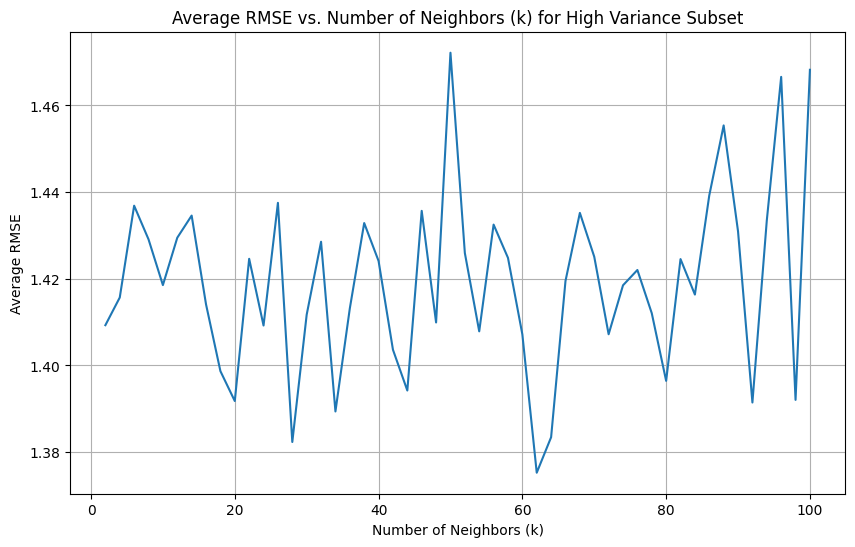

Minimum average RMSE for High Variance Subset: 1.375234339754143
Corresponding k value: 62


In [99]:
# Plot average RMSE against k for the High Variance subset
plt.figure(figsize=(10, 6))
plt.plot(k_values, min_avg_rmse_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Neighbors (k) for High Variance Subset')
plt.grid(True)
plt.show()

# Find the minimum average RMSE and corresponding k value for the High Variance subset
min_avg_rmse_high_variance = min(min_avg_rmse_values)
min_k_high_variance = k_values[np.argmin(min_avg_rmse_values)]

print('Minimum average RMSE for High Variance Subset:', min_avg_rmse_high_variance)
print('Corresponding k value:', min_k_high_variance)

#### PART B

Computing the pearson similarity matrix...
Done computing similarity matrix.


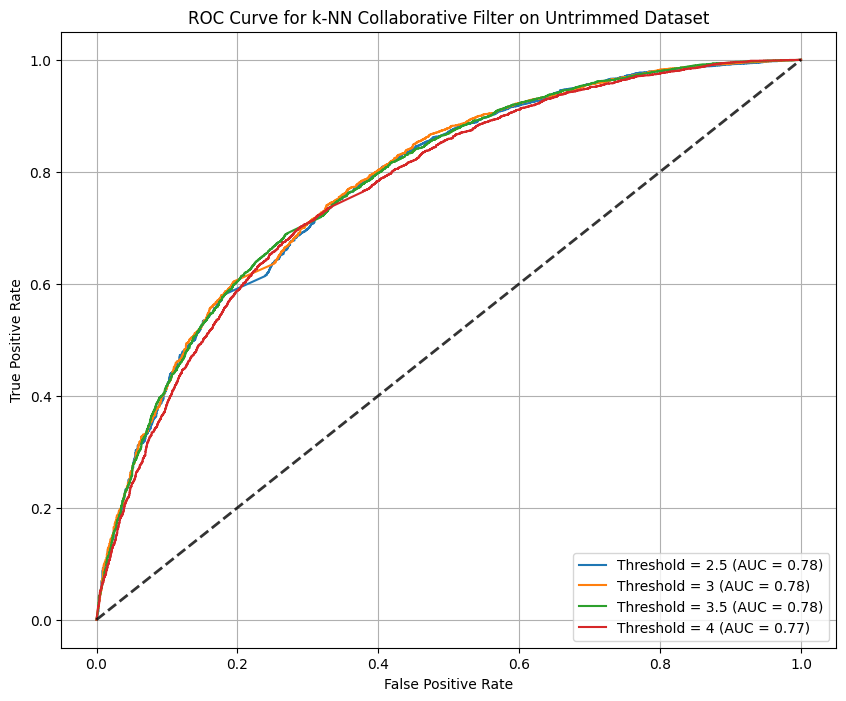

Computing the pearson similarity matrix...
Done computing similarity matrix.


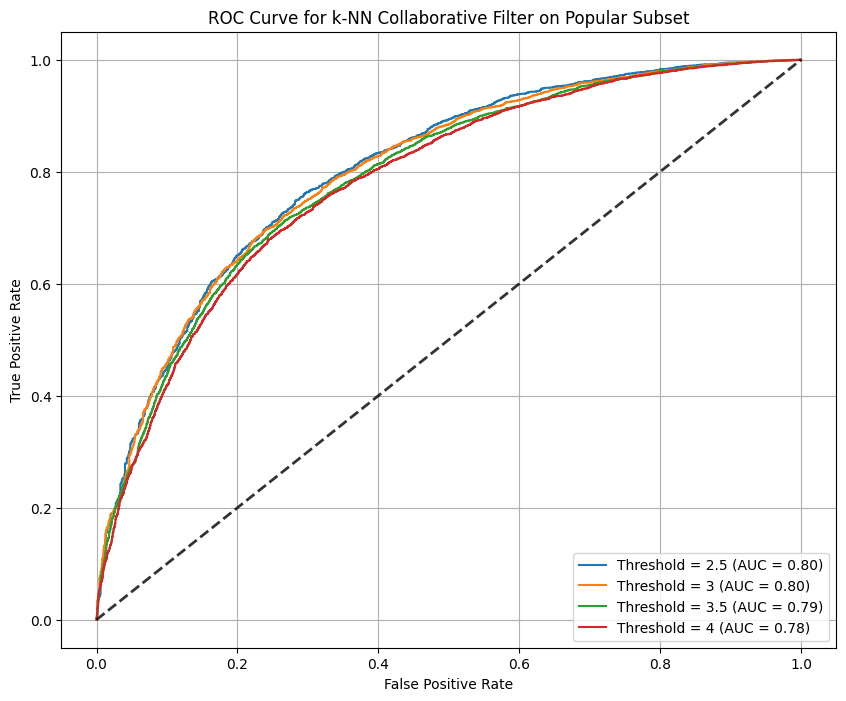

Computing the pearson similarity matrix...
Done computing similarity matrix.


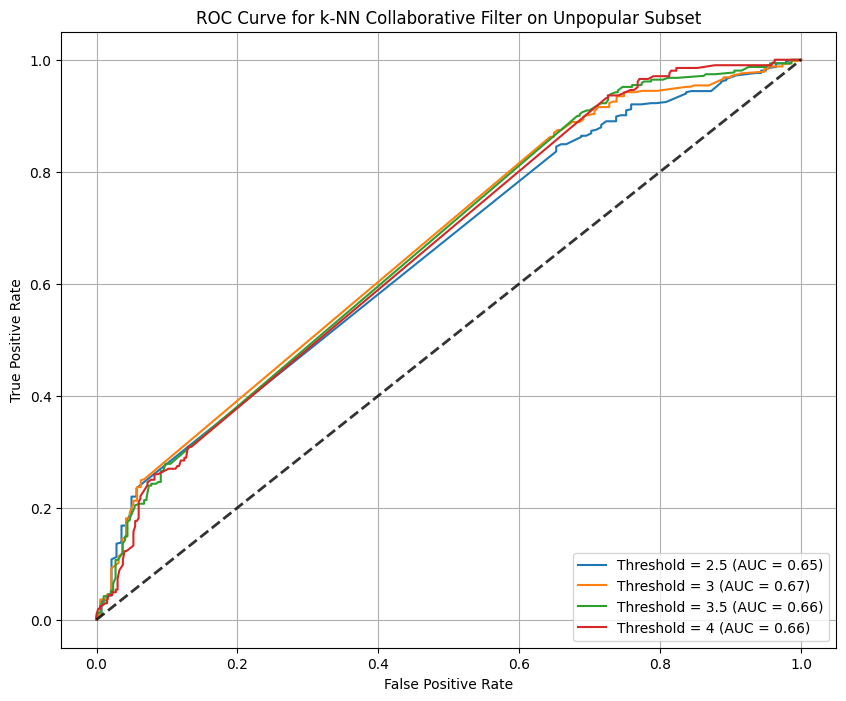

Computing the pearson similarity matrix...
Done computing similarity matrix.


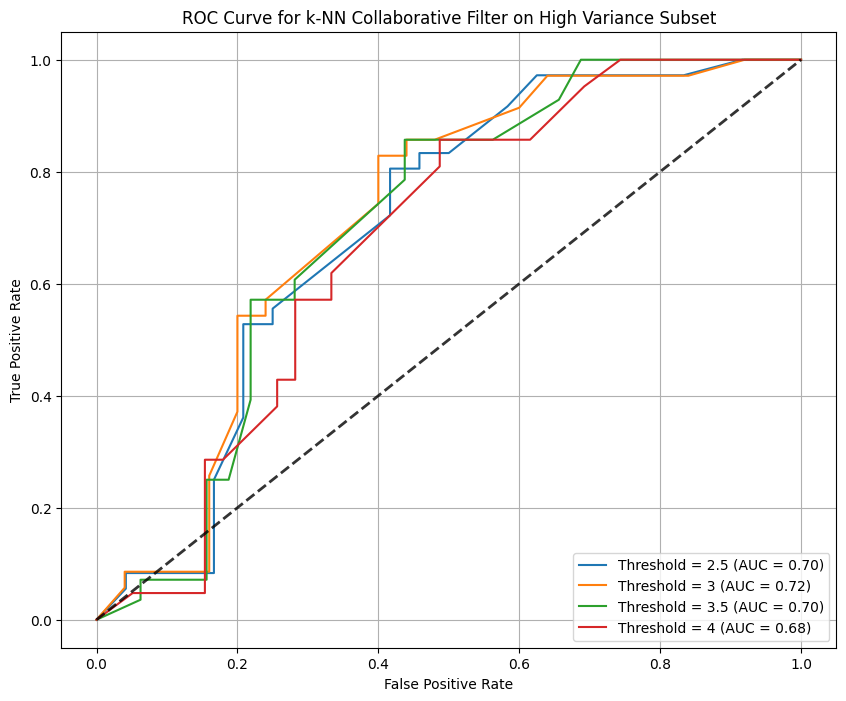

In [18]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import KNNWithMeans
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves_for_dataset(df, title):
    reader = Reader(rating_scale=(0.5, 5))
    ratings_data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    
    threshold_values = [2.5, 3, 3.5, 4]

    # Split the data into train and test sets
    trainset, testset = train_test_split(ratings_data, test_size=0.1)

    k = 20
    model = KNNWithMeans(k=k, sim_options={'name': 'pearson'})
    model.fit(trainset)
    predictions = model.test(testset)

    fprs = []
    tprs = []
    aucs = []

    for threshold in threshold_values:
        thresholded_labels = [1 if prediction.r_ui >= threshold else 0 for prediction in predictions]
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(thresholded_labels, [prediction.est for prediction in predictions])
        # Compute AUC
        roc_auc = auc(fpr, tpr)

        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(roc_auc)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i, threshold in enumerate(threshold_values):
        plt.plot(fprs[i], tprs[i], label=f'Threshold = {threshold} (AUC = {aucs[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Load the datasets
original_df = ratings
popular_subset_df = pd.read_csv("popular_subset.csv")
unpopular_subset_df = pd.read_csv("unpopular_subset.csv")
high_variance_subset_df = pd.read_csv("high_variance_subset.csv")

# Plot ROC curves for each dataset
plot_roc_curves_for_dataset(original_df, 'ROC Curve for k-NN Collaborative Filter on Untrimmed Dataset')
plot_roc_curves_for_dataset(popular_subset_df, 'ROC Curve for k-NN Collaborative Filter on Popular Subset')
plot_roc_curves_for_dataset(unpopular_subset_df, 'ROC Curve for k-NN Collaborative Filter on Unpopular Subset')
plot_roc_curves_for_dataset(high_variance_subset_df, 'ROC Curve for k-NN Collaborative Filter on High Variance Subset')


### Question 8

#### PART A

In [104]:
from surprise import Dataset, Reader, NMF
from surprise.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

# Load the original dataset
reader = Reader(rating_scale = (0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 51, 2)

avg_rmse_values = []
avg_mae_values = []

# Iterate over each k value
for k in k_values:
    algo = NMF(n_factors = k)
    results = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 10)

    # Compute average RMSE and MAE
    avg_rmse = np.mean(results['test_rmse'])
    avg_mae = np.mean(results['test_mae'])

    avg_rmse_values.append(avg_rmse)
    avg_mae_values.append(avg_mae)

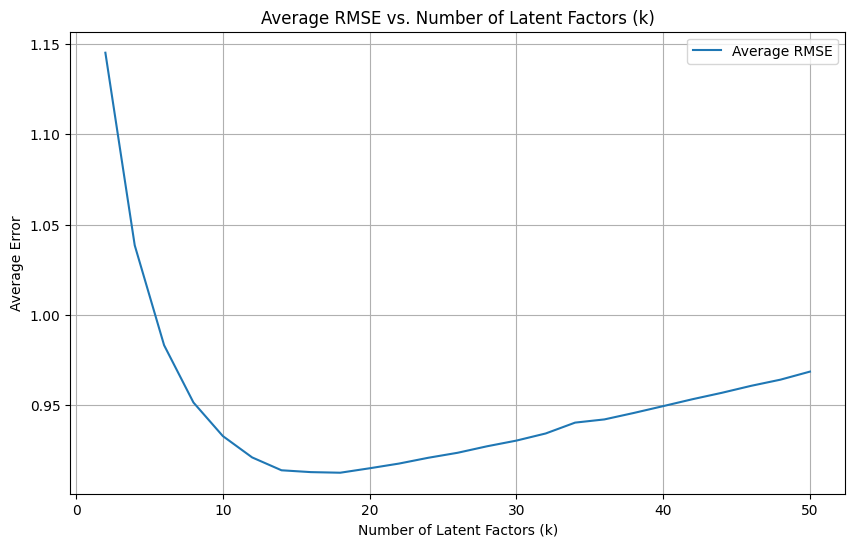

In [105]:
# Plot average RMSE against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_rmse_values, label='Average RMSE')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average Error')
plt.title('Average RMSE vs. Number of Latent Factors (k)')
plt.legend()
plt.grid(True)
plt.show()

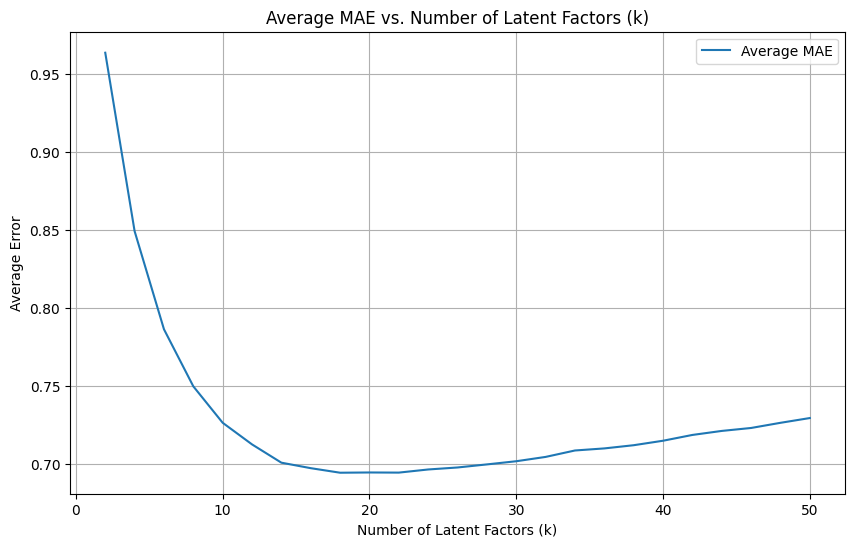

In [107]:
# Plot average MAE against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_mae_values, label = 'Average MAE')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average Error')
plt.title('Average MAE vs. Number of Latent Factors (k)')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
min_rmse = min(avg_rmse_values)
min_index_rmse = np.argmin(avg_rmse_values)
min_mae = min(avg_mae_values)
min_index_mae = np.argmin(avg_mae_values)

print('Minimum value of RMSE: ', min_rmse)
print('Index corresponding to minimum RMSE: ', min_index_rmse)
print('Minimum value of MAE: ', min_mae)
print('Index corresponding to minimum MAE: ', min_index_mae)

Minimum value of RMSE:  0.9124991928132682
Index corresponding to minimum RMSE:  8
Minimum value of MAE:  0.694186245761646
Index corresponding to minimum MAE:  8


#### PART C

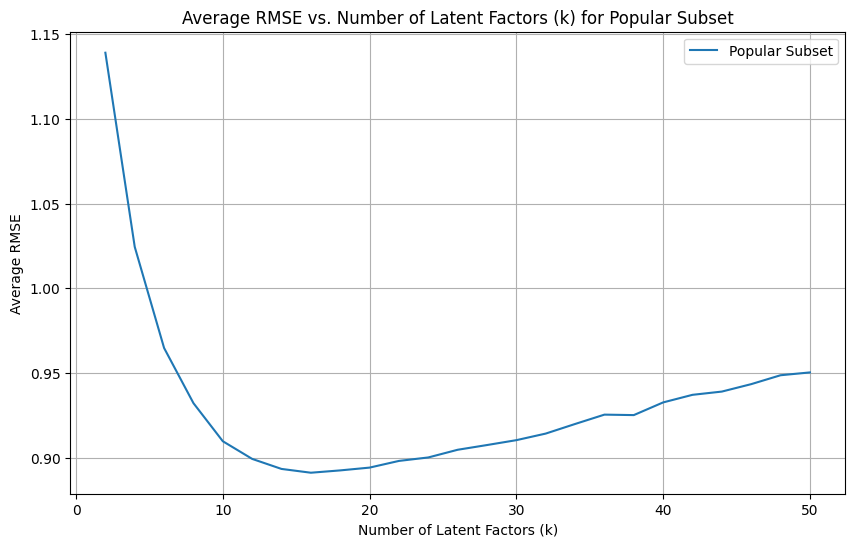

Minimum average RMSE for Popular Subset: 0.8912614891279954
Corresponding k value: 16


In [110]:
reader = Reader(rating_scale=(0.5, 5.0))
popular_subset_data = Dataset.load_from_df(popular_subset_df[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 51, 2)

min_avg_rmse_popular = []

# Iterate over each k value
for k in k_values:
    algo_popular = NMF(n_factors = k)
    results_popular = cross_validate(algo_popular, popular_subset_data,
                                     measures=['RMSE'], cv = 10)
    avg_rmse_popular = np.mean(results_popular['test_rmse'])
    min_avg_rmse_popular.append(avg_rmse_popular)


# Plot 
plt.figure(figsize = (10, 6))
plt.plot(k_values, min_avg_rmse_popular, label = 'Popular Subset')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k) for Popular Subset')
plt.legend()
plt.grid(True)
plt.show()

# Find the minimum average RMSE
min_rmse_popular = min(min_avg_rmse_popular)
min_k_popular = k_values[np.argmin(min_avg_rmse_popular)]

print('Minimum average RMSE for Popular Subset:', min_rmse_popular)
print('Corresponding k value:', min_k_popular)

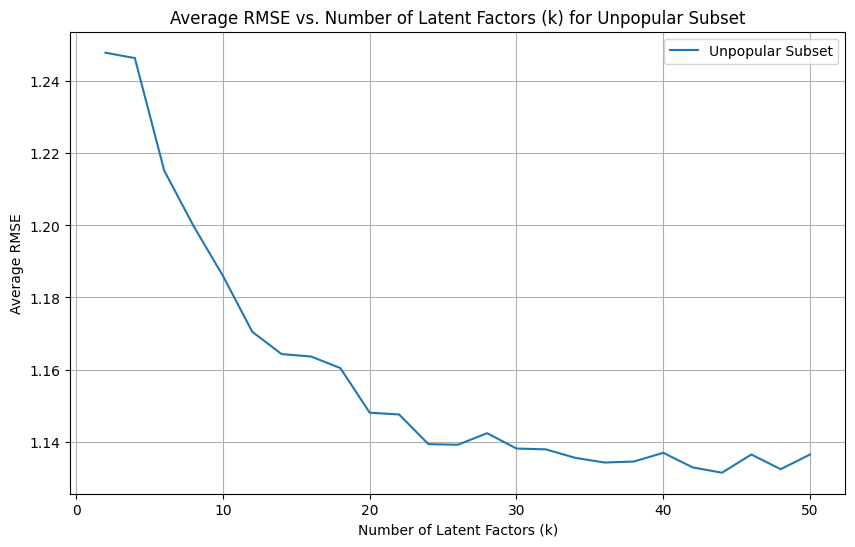

Minimum average RMSE for Unpopular Subset: 1.1313591353365524
Corresponding k value: 44


In [111]:
reader = Reader(rating_scale=(0.5, 5.0))
unpopular_subset_data = Dataset.load_from_df(unpopular_subset_df[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 51, 2)

min_avg_rmse_unpopular = []

for k in k_values:
    algo_unpopular = NMF(n_factors = k)
    results_unpopular = cross_validate(algo_unpopular, unpopular_subset_data,
                                       measures=['RMSE'], cv = 10)
    avg_rmse_unpopular = np.mean(results_unpopular['test_rmse'])
    min_avg_rmse_unpopular.append(avg_rmse_unpopular)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, min_avg_rmse_unpopular, label='Unpopular Subset')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k) for Unpopular Subset')
plt.legend()
plt.grid(True)
plt.show()

# Find the minimum average RMSE
min_rmse_unpopular = min(min_avg_rmse_unpopular)
min_k_unpopular = k_values[np.argmin(min_avg_rmse_unpopular)]

print('Minimum average RMSE for Unpopular Subset:', min_rmse_unpopular)
print('Corresponding k value:', min_k_unpopular)

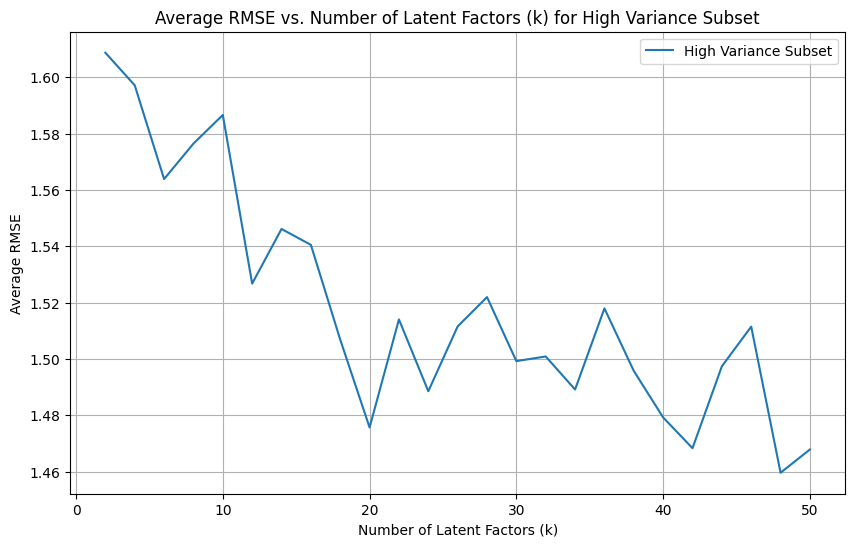

Minimum average RMSE for High Variance Subset: 1.459604904545923
Corresponding k value: 48


In [112]:
reader = Reader(rating_scale=(0.5, 5.0))
high_variance_subset_data = Dataset.load_from_df(high_variance_subset_df[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 51, 2)

min_avg_rmse_high_variance = []

# Iterate over each k value
for k in k_values:
    algo_high_variance = NMF(n_factors = k)
    results_high_variance = cross_validate(algo_high_variance, high_variance_subset_data, 
                                           measures = ['RMSE'], cv = 10)
    avg_rmse_high_variance = np.mean(results_high_variance['test_rmse'])
    min_avg_rmse_high_variance.append(avg_rmse_high_variance)

# Plot 
plt.figure(figsize = (10, 6))
plt.plot(k_values, min_avg_rmse_high_variance, label = 'High Variance Subset')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k) for High Variance Subset')
plt.legend()
plt.grid(True)
plt.show()

# Find the minimum average RMSE 
min_rmse_high_variance = min(min_avg_rmse_high_variance)
min_k_high_variance = k_values[np.argmin(min_avg_rmse_high_variance)]

print('Minimum average RMSE for High Variance Subset:', min_rmse_high_variance)
print('Corresponding k value:', min_k_high_variance)

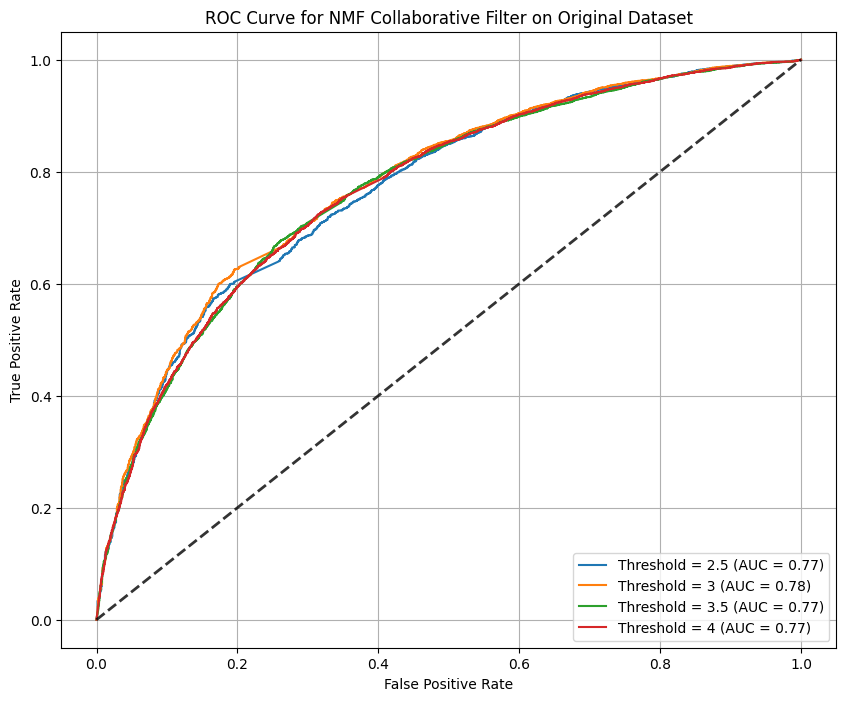

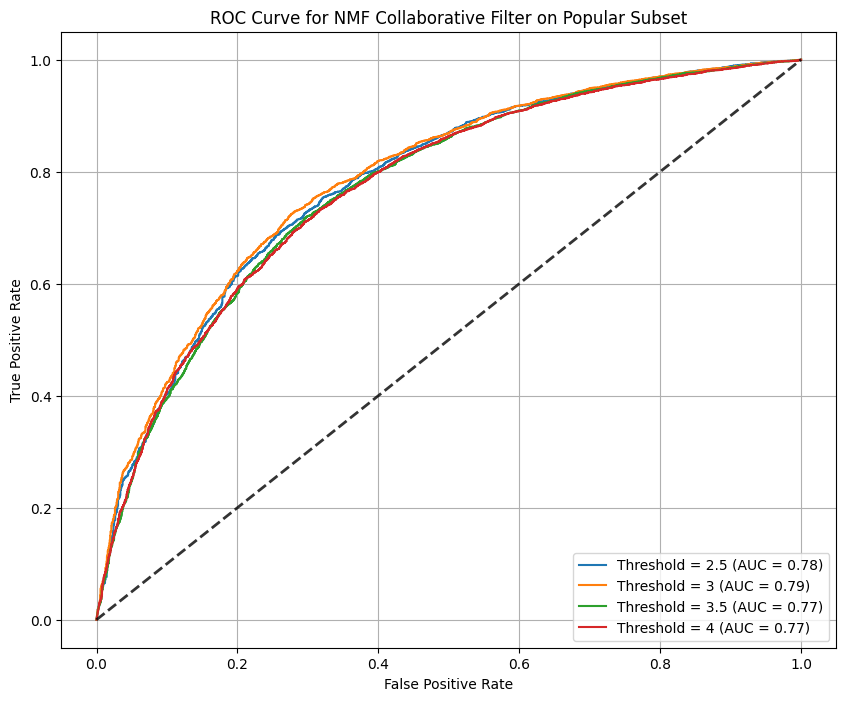

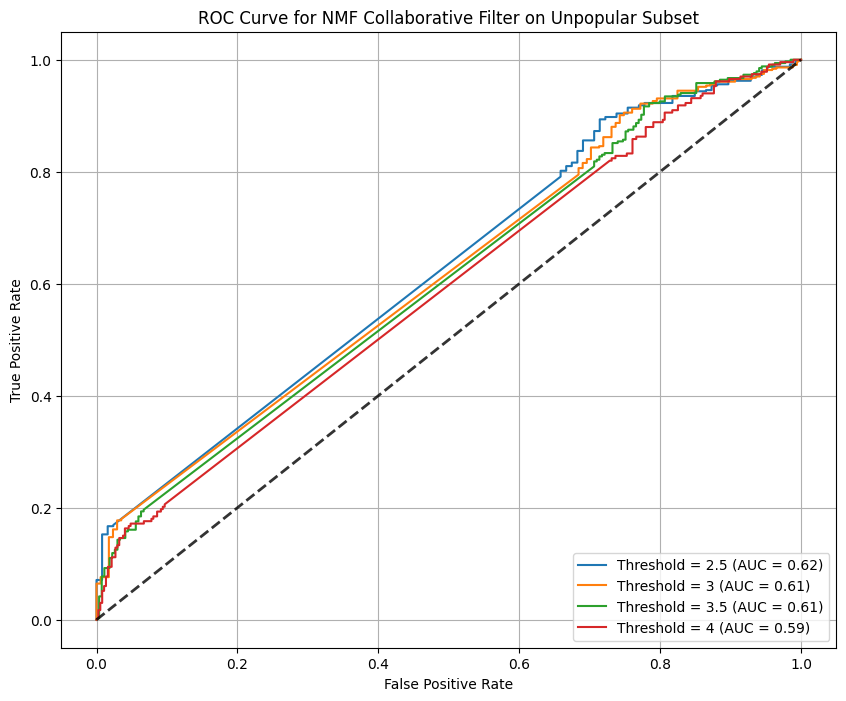

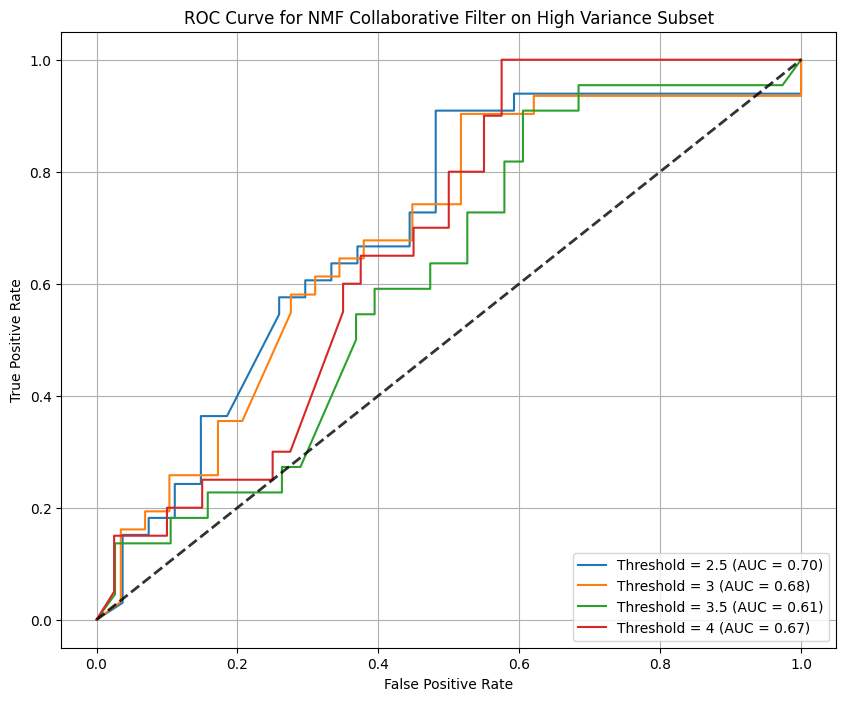

In [20]:
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import NMF
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def plot_roc_curves_for_dataset(dataset_df, title):
    threshold_values = [2.5, 3, 3.5, 4]

    # Load the data and split into train and test sets
    data = Dataset.load_from_df(dataset_df[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=0.1)

    k = 20 
    model = NMF(n_factors=k)
    model.fit(trainset)

    predictions = model.test(testset)

    fprs = []
    tprs = []
    aucs = []

    for threshold in threshold_values:
        thresholded_labels = [1 if prediction.r_ui >= threshold else 0 for prediction in predictions]
        fpr, tpr, _ = roc_curve([prediction.r_ui >= threshold for prediction in predictions],
                                [prediction.est for prediction in predictions])
        roc_auc = auc(fpr, tpr)

        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(roc_auc)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i, threshold in enumerate(threshold_values):
        plt.plot(fprs[i], tprs[i], label=f'Threshold = {threshold} (AUC = {aucs[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Load the datasets
original_df = ratings
popular_subset_df = pd.read_csv("popular_subset.csv")
unpopular_subset_df = pd.read_csv("unpopular_subset.csv")
high_variance_subset_df = pd.read_csv("high_variance_subset.csv")

# Plot ROC curves for each dataset
plot_roc_curves_for_dataset(original_df, 'ROC Curve for NMF Collaborative Filter on Original Dataset')
plot_roc_curves_for_dataset(popular_subset_df, 'ROC Curve for NMF Collaborative Filter on Popular Subset')
plot_roc_curves_for_dataset(unpopular_subset_df, 'ROC Curve for NMF Collaborative Filter on Unpopular Subset')
plot_roc_curves_for_dataset(high_variance_subset_df, 'ROC Curve for NMF Collaborative Filter on High Variance Subset')


### Question 9

In [119]:
ratings = pd.read_csv('Synthetic_Movie_Lens/ratings.csv')
genres = pd.read_csv('Synthetic_Movie_Lens/movies.csv', usecols=['movieId', 'genres'])

reader = Reader(rating_scale=(0.5, 5.0))
ratings_dataset = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(ratings_dataset, test_size = 0.1)

# NMF model
nmf = NMF(n_factors = 20, n_epochs = 50)
nmf.fit(trainset)

V = nmf.qi

# Print the genres of the top 10 movies for each column of V
for col_index, latent_factor in enumerate(V.T):
    print(f'Column number of V: {col_index}')
    sorted_indices = np.argsort(latent_factor)[::-1][:10]
    top_genres = genres.iloc[sorted_indices]['genres'].tolist()
    print('\n'.join(top_genres))
    print('_______________________\n')

Column number of V: 0
Comedy|Drama|Romance
Comedy|Drama
Comedy|Romance
Comedy|Horror
Drama|Romance|War
Drama|Romance
Comedy|Musical|Romance
Comedy|Documentary
Comedy|Drama
Comedy|Drama
_______________________

Column number of V: 1
Action
Drama
Documentary
Drama|War
Crime|Drama
Comedy
Drama|Western
Adventure|Comedy|Mystery|Romance
Drama
Animation|Children
_______________________

Column number of V: 2
Comedy|Crime|Drama|Thriller
Comedy|Crime
Comedy
Comedy|Sci-Fi
Comedy|Drama|Romance
Drama|Fantasy
Action|Comedy|Crime|Thriller
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi
Action|Drama|Thriller
Action|Adventure|Animation|Children|Fantasy
_______________________

Column number of V: 3
Crime|Thriller
Drama
Adventure|Children|Drama|Fantasy
Comedy
Adventure|Comedy|Mystery|Romance
Horror|Sci-Fi
Comedy|Romance
Adventure|Children|Fantasy|Sci-Fi|Thriller
Mystery|Thriller
Comedy|Romance
_______________________

Column number of V: 4
Action|Adventure|Drama|War
Drama
Comedy|Sci-Fi
Drama
A

### Question 10

#### PART A

In [25]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
import numpy as np
import matplotlib.pyplot as plt

reader = Reader(rating_scale = (0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

k_values = np.arange(2, 51, 2)

avg_rmse_values = []
avg_mae_values = []

for k in k_values:
    algo = SVD(n_factors = k)
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = 10)

    avg_rmse = np.mean(results['test_rmse'])
    avg_mae = np.mean(results['test_mae'])

    avg_rmse_values.append(avg_rmse)
    avg_mae_values.append(avg_mae)

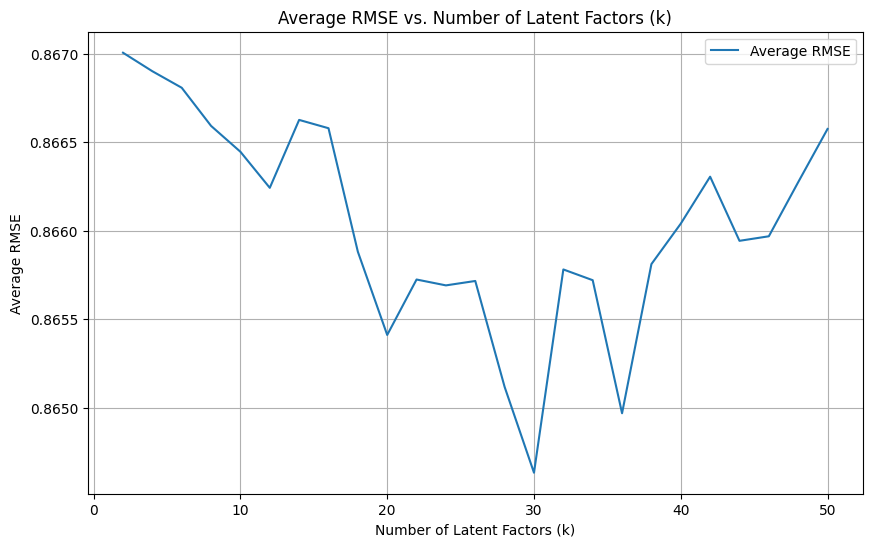

In [26]:
# Plot average RMSE against k
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_rmse_values, label = 'Average RMSE')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k)')
plt.legend()
plt.grid(True)
plt.show()

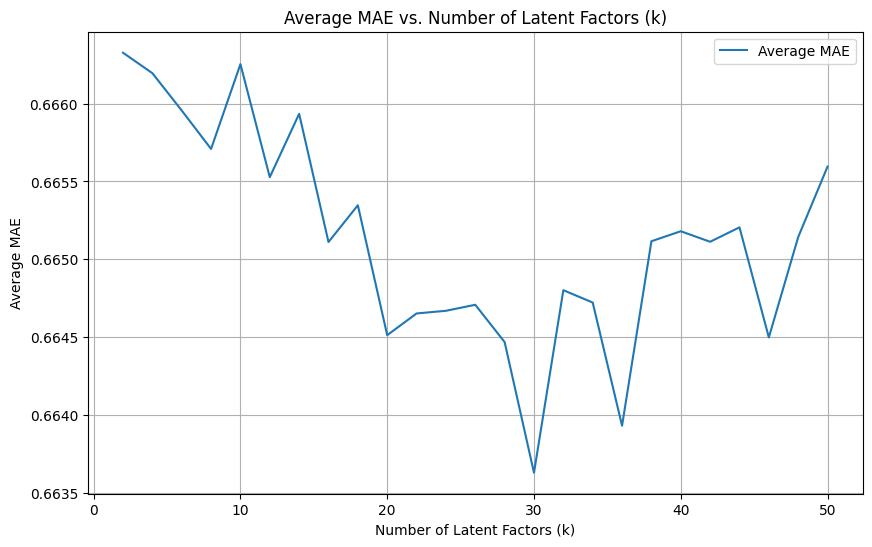

In [27]:
# Plot average MAE against k
plt.figure(figsize = (10, 6))
plt.plot(k_values, avg_mae_values, label = 'Average MAE')
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average MAE')
plt.title('Average MAE vs. Number of Latent Factors (k)')
plt.legend()
plt.grid(True)
plt.show()

#### PART B

In [28]:
min_rmse = min(avg_rmse_values)
min_index_rmse = np.argmin(avg_rmse_values)
min_mae = min(avg_mae_values)
min_index_mae = np.argmin(avg_mae_values)

print('Minimum average RMSE:', min_rmse)
print('Corresponding k value for minimum RMSE:', k_values[min_index_rmse])
print('Minimum average MAE:', min_mae)
print('Corresponding k value for minimum MAE:', k_values[min_index_mae])

Minimum average RMSE: 0.86463148086779
Corresponding k value for minimum RMSE: 30
Minimum average MAE: 0.6636303706613157
Corresponding k value for minimum MAE: 30


#### PART C

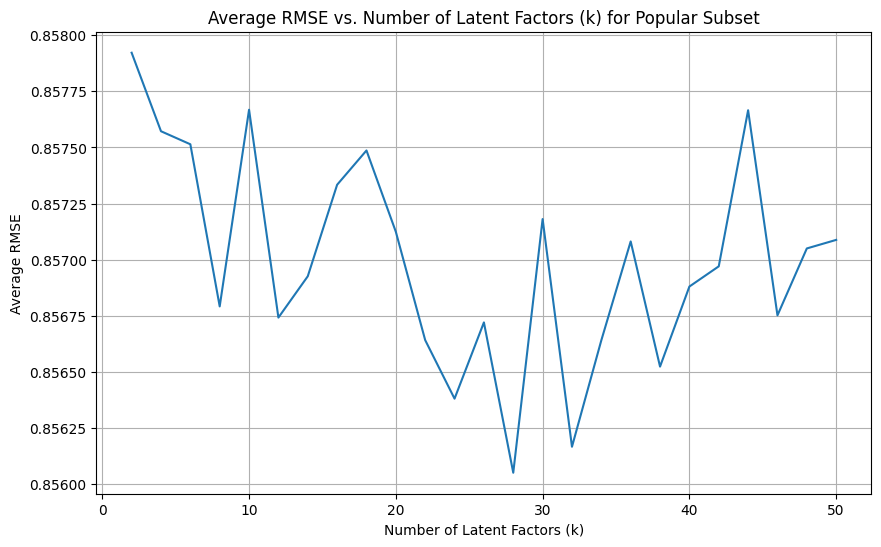

Minimum average RMSE for Popular Subset: 0.8560500717001076
Corresponding k value: 28


In [130]:
popular_subset_df = pd.read_csv("popular_subset.csv")
popular_data = Dataset.load_from_df(popular_subset_df[['userId', 'movieId', 'rating']], reader)

min_avg_rmse_values_popular = []

for k in k_values:
    algo = SVD(n_factors = k)
    popular_results = cross_validate(algo, popular_data, measures = ['RMSE'], cv = 10)
    avg_rmse_popular = np.mean(popular_results['test_rmse'])
    min_avg_rmse_values_popular.append(avg_rmse_popular)


plt.figure(figsize=(10, 6))
plt.plot(k_values, min_avg_rmse_values_popular)
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k) for Popular Subset')
plt.grid(True)
plt.show()

min_avg_rmse_popular = min(min_avg_rmse_values_popular)
min_k_popular = k_values[np.argmin(min_avg_rmse_values_popular)]
print('Minimum average RMSE for Popular Subset:', min_avg_rmse_popular)
print('Corresponding k value:', min_k_popular)

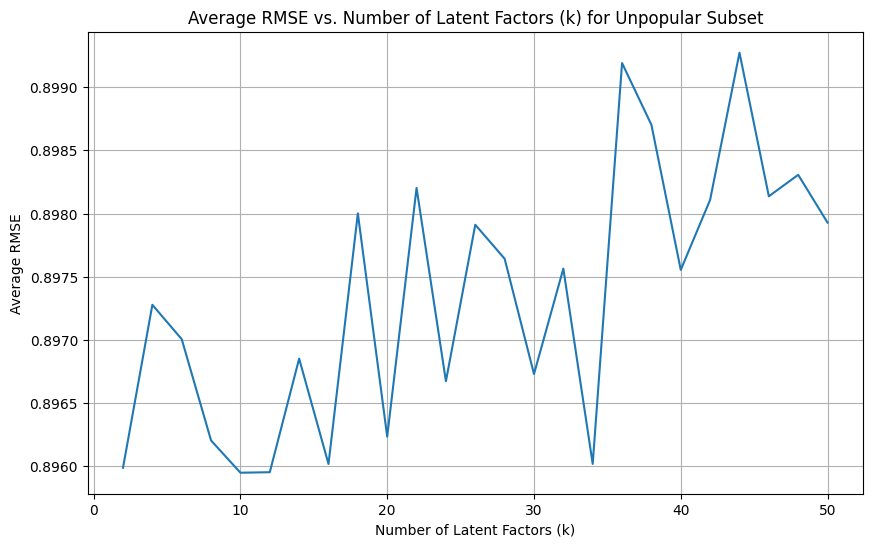

Minimum average RMSE for Unpopular Subset: 0.8959487882402781
Corresponding k value: 10


In [131]:
unpopular_subset_df = pd.read_csv("unpopular_subset.csv")
unpopular_data = Dataset.load_from_df(unpopular_subset_df[['userId', 'movieId', 'rating']], reader)

min_avg_rmse_values_unpopular = []

for k in k_values:
    algo = SVD(n_factors = k)
    unpopular_results = cross_validate(algo, unpopular_data, measures = ['RMSE'], cv = 10)
    avg_rmse_unpopular = np.mean(unpopular_results['test_rmse'])
    min_avg_rmse_values_unpopular.append(avg_rmse_unpopular)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(k_values, min_avg_rmse_values_unpopular)
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k) for Unpopular Subset')
plt.grid(True)
plt.show()

min_avg_rmse_unpopular = min(min_avg_rmse_values_unpopular)
min_k_unpopular = k_values[np.argmin(min_avg_rmse_values_unpopular)]
print('Minimum average RMSE for Unpopular Subset:', min_avg_rmse_unpopular)
print('Corresponding k value:', min_k_unpopular)

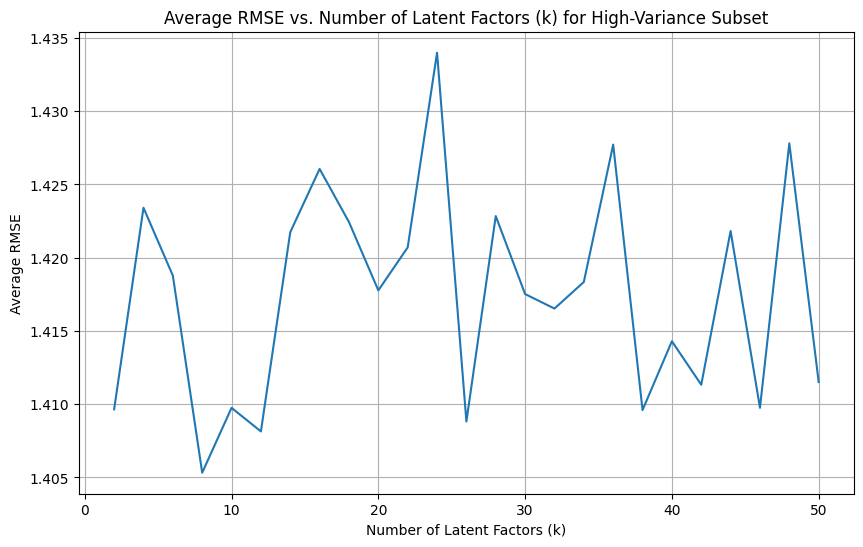

Minimum average RMSE for High-Variance Subset: 1.405320774861676
Corresponding k value: 8


In [132]:
high_variance_subset_df = pd.read_csv("high_variance_subset.csv")
high_variance_data = Dataset.load_from_df(high_variance_subset_df[['userId', 'movieId', 'rating']], reader)

min_avg_rmse_values_high_variance = []

for k in k_values:
    algo = SVD(n_factors = k)
    high_variance_results = cross_validate(algo, high_variance_data, measures = ['RMSE'], cv = 10)
    avg_rmse_high_variance = np.mean(high_variance_results['test_rmse'])
    min_avg_rmse_values_high_variance.append(avg_rmse_high_variance)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(k_values, min_avg_rmse_values_high_variance)
plt.xlabel('Number of Latent Factors (k)')
plt.ylabel('Average RMSE')
plt.title('Average RMSE vs. Number of Latent Factors (k) for High-Variance Subset')
plt.grid(True)
plt.show()

min_avg_rmse_high_variance = min(min_avg_rmse_values_high_variance)
min_k_high_variance = k_values[np.argmin(min_avg_rmse_values_high_variance)]
print('Minimum average RMSE for High-Variance Subset:', min_avg_rmse_high_variance)
print('Corresponding k value:', min_k_high_variance)

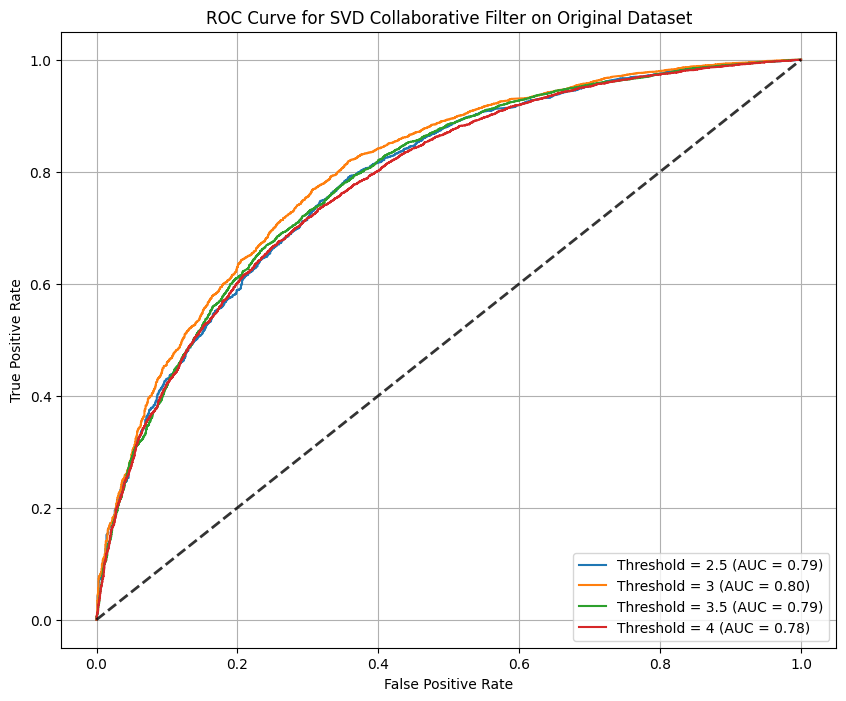

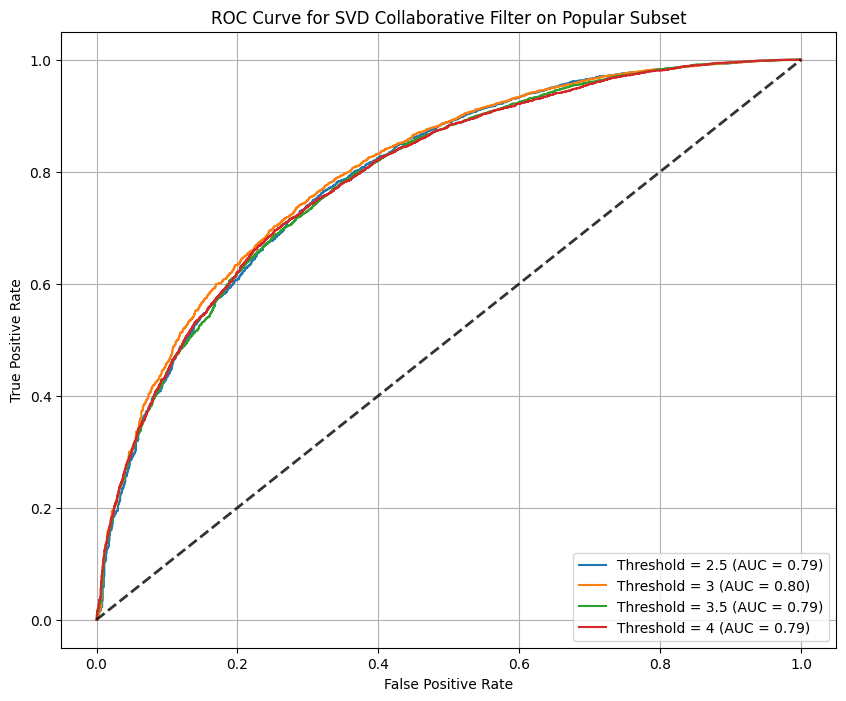

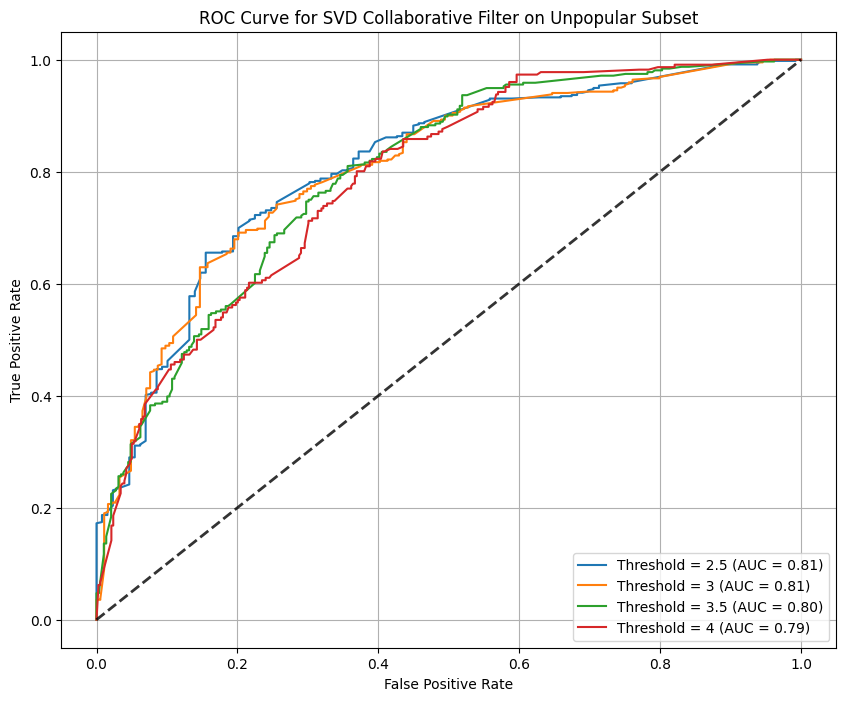

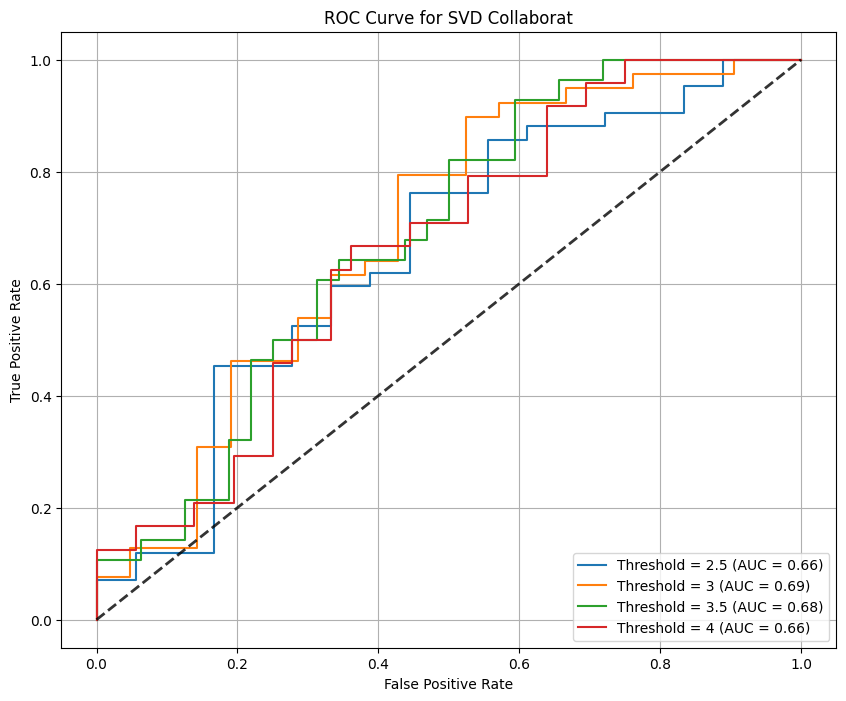

In [34]:
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import SVD
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset, Reader

def plot_roc_curves_for_dataset(dataset_df, title):
    threshold_values = [2.5, 3, 3.5, 4]

    # Load the data and split into train and test sets
    reader = Reader(rating_scale=(0.5, 5))
    data = Dataset.load_from_df(dataset_df[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=0.1)

    k = 20 
    model = SVD(n_factors=k)
    model.fit(trainset)

    predictions = model.test(testset)

    fprs = []
    tprs = []
    aucs = []

    for threshold in threshold_values:
        thresholded_labels = [1 if prediction.r_ui >= threshold else 0 for prediction in predictions]
        fpr, tpr, _ = roc_curve([prediction.r_ui >= threshold for prediction in predictions],
                                [prediction.est for prediction in predictions])
        roc_auc = auc(fpr, tpr)

        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(roc_auc)

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i, threshold in enumerate(threshold_values):
        plt.plot(fprs[i], tprs[i], label=f'Threshold = {threshold} (AUC = {aucs[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Load the datasets
original_df = ratings
popular_subset_df = pd.read_csv("popular_subset.csv")
unpopular_subset_df = pd.read_csv("unpopular_subset.csv")
high_variance_subset_df = pd.read_csv("high_variance_subset.csv")

# Plot ROC curves for each dataset
plot_roc_curves_for_dataset(original_df, 'ROC Curve for SVD Collaborative Filter on Original Dataset')
plot_roc_curves_for_dataset(popular_subset_df, 'ROC Curve for SVD Collaborative Filter on Popular Subset')
plot_roc_curves_for_dataset(unpopular_subset_df, 'ROC Curve for SVD Collaborative Filter on Unpopular Subset')
plot_roc_curves_for_dataset(high_variance_subset_df, 'ROC Curve for SVD Collaborat')

### Question 11

In [140]:
from surprise.prediction_algorithms.random_pred import NormalPredictor
from surprise.model_selection import KFold
from surprise import Dataset, Reader
from surprise import accuracy

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

naive_cf = NormalPredictor()

kf = KFold(n_splits = 10)

rmse_values = []

for trainset, testset in kf.split(data):
    naive_cf.fit(trainset)
    predictions = naive_cf.test(testset)
    fold_rmse = accuracy.rmse(predictions, verbose = False)
    rmse_values.append(fold_rmse)

# Calculate the average RMSE across all folds
avg_rmse = sum(rmse_values) / len(rmse_values)
print('Average RMSE:', avg_rmse)

Average RMSE: 1.426729406867231


In [142]:
from sklearn.metrics import mean_squared_error

local_rmse_naive_pop = []

kf = KFold(n_splits = 10)

for trainset, testset in kf.split(ratings_dataset):
    trim_list = []
    unique, counts = np.unique([row[1] for row in testset], return_counts = True)
    for i in range(len(counts)):
        if counts[i] > 2:
            trim_list.append(unique[i])
    trimmed_set = [j for j in testset if j[1] in trim_list]

    mean_rating = np.mean([rating for (_, _, rating) in trainset.all_ratings()])

    predictions = [mean_rating for _ in range(len(trimmed_set))]

    gt = [row[2] for row in trimmed_set]
    
    local_rmse_naive_pop.append(np.sqrt(mean_squared_error(gt, predictions)))

# Calculate the average RMSE across all folds
rmse_naive_pop = np.mean(local_rmse_naive_pop)
print(rmse_naive_pop)

1.0178205089965284


In [224]:
local_rmse_naive_unpop = []

kf = KFold(n_splits = 10)

for trainset, testset in kf.split(ratings_dataset):
    trim_list = []
    unique, counts = np.unique([row[1] for row in testset], return_counts=True)
    for i in range(len(counts)):
        if counts[i] <= 2:
            trim_list.append(unique[i])
    trimmed_set = [j for j in testset if j[1] in trim_list]
    
    mean_rating = np.mean([rating for (_, _, rating) in trainset.all_ratings()])
    
    predictions = [mean_rating for _ in range(len(trimmed_set))]
    
    gt = [row[2] for row in trimmed_set]
    
    local_rmse_naive_unpop.append(np.sqrt(mean_squared_error(gt, predictions)))

# Calculate the average RMSE across all folds
rmse_naive_unpop = np.mean(local_rmse_naive_unpop)
print(rmse_naive_unpop)

1.0983692535097134


In [143]:
local_rmse_naive_high_variance = []

kf = KFold(n_splits=10)

for trainset, testset in kf.split(ratings_dataset):
    ratings = [row[2] for row in testset]
    variance = np.var(ratings)
    
    trimmed_set = [j for j in testset if j[2] >= 3 and j[2] <= 5]
    
    mean_rating = np.mean([rating for (_, _, rating) in trainset.all_ratings()])
    
    predictions = [mean_rating for _ in range(len(trimmed_set))]
    
    gt = [row[2] for row in trimmed_set]
    
    local_rmse_naive_high_variance.append(np.sqrt(mean_squared_error(gt, predictions)))

# Calculate the average RMSE across all folds
rmse_naive_high_variance = np.mean(local_rmse_naive_high_variance)
print(rmse_naive_high_variance)

0.781156875583551


### Question 12

Computing the pearson similarity matrix...
Done computing similarity matrix.


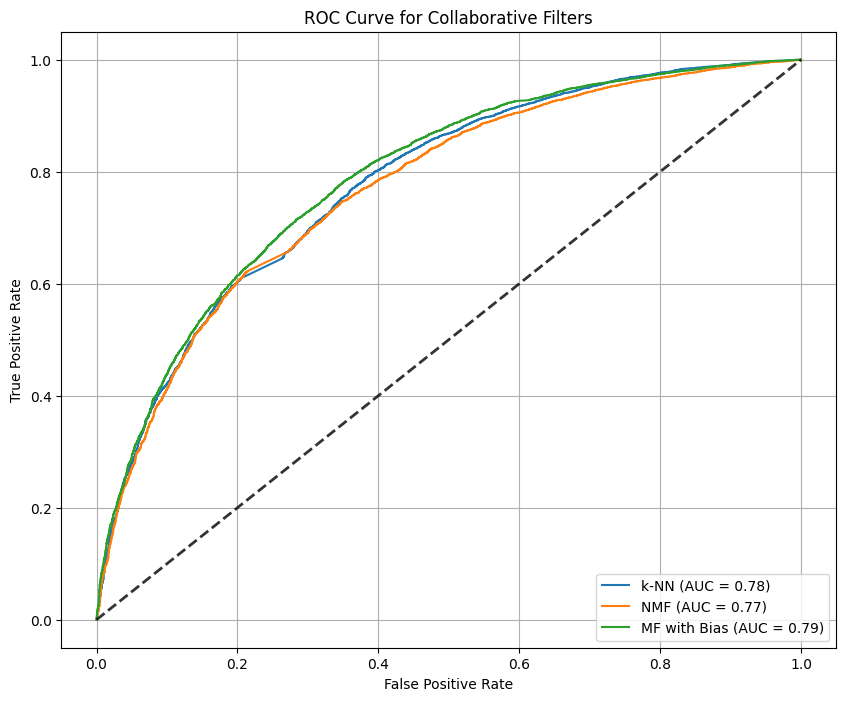

In [150]:
trainset, testset = train_test_split(data, test_size = 0.2)

knn_model = KNNWithMeans(k = 20, sim_options = {'name': 'pearson'})
knn_model.fit(trainset)
predictions_knn = knn_model.test(testset)

# Compute ROC curve and AUC for k-NN 
true_labels_knn = [int(r >= 3) for (_, _, r) in testset]
estimated_ratings_knn = [prediction.est for prediction in predictions_knn]
fpr_knn, tpr_knn, _ = roc_curve(true_labels_knn, estimated_ratings_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Train the NMF 
nmf_model = NMF(n_factors = 20)
nmf_model.fit(trainset)
predictions_nmf = nmf_model.test(testset)

# Compute ROC curve and AUC for NMF 
true_labels_nmf = [int(r >= 3) for (_, _, r) in testset]
estimated_ratings_nmf = [prediction.est for prediction in predictions_nmf]
fpr_nmf, tpr_nmf, _ = roc_curve(true_labels_nmf, estimated_ratings_nmf)
roc_auc_nmf = auc(fpr_nmf, tpr_nmf)

# Train the MF with bias
mf_model = SVD()
mf_model.fit(trainset)
predictions_mf = mf_model.test(testset)

# Compute ROC curve and AUC for MF with bias 
true_labels_mf = [int(r >= 3) for (_, _, r) in testset]
estimated_ratings_mf = [prediction.est for prediction in predictions_mf]
fpr_mf, tpr_mf, _ = roc_curve(true_labels_mf, estimated_ratings_mf)
roc_auc_mf = auc(fpr_mf, tpr_mf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, label = f'k-NN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nmf, tpr_nmf, label = f'NMF (AUC = {roc_auc_nmf:.2f})')
plt.plot(fpr_mf, tpr_mf, label = f'MF with Bias (AUC = {roc_auc_mf:.2f})')
plt.plot([0, 1], [0, 1], linestyle = '--', lw = 2, color = 'k', alpha = .8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Collaborative Filters')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()